## Importing Relevent Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## Loading The Data




In [2]:
data=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Simple Linear Regression /Salary_Data.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,1081,8.4,102440
1,804,17.1,203206
2,1413,13.1,152774
3,2928,15.2,172101
4,4062,15.9,161348


In [3]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,575.000000,575.000000,575.000000
mean,3041.012174,10.220522,121900.565217
std,1741.505418,5.792744,56825.972442
min,0.000000,1.000000,5942.000000
25%,1550.000000,6.200000,83324.500000
50%,3073.000000,10.500000,128801.000000
75%,4550.000000,14.350000,161600.500000
max,5996.000000,28.000000,272056.000000


In [4]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,575.000000,575.000000,575.000000
mean,3041.012174,10.220522,121900.565217
std,1741.505418,5.792744,56825.972442
min,0.000000,1.000000,5942.000000
25%,1550.000000,6.200000,83324.500000
50%,3073.000000,10.500000,128801.000000
75%,4550.000000,14.350000,161600.500000
max,5996.000000,28.000000,272056.000000


In [5]:
data.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,-0.313625,-0.344501
YearsExperience,-0.313625,1.000000,0.976206
Salary,-0.344501,0.976206,1.000000


In [6]:
#defining the dependent and independent variables
y=data['Salary']
x1=data['YearsExperience']

### Exploring the Data

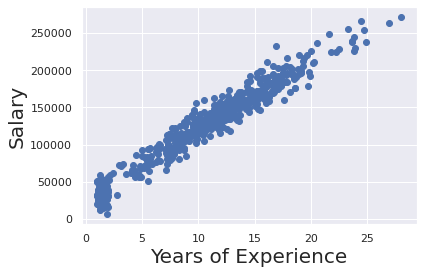

In [7]:
plt.scatter(x1,y)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

## Linear Regression Using statsmodels

### Performing Linear Regression on the data and OLS Summary


In [8]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.161e+04
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:41:36   Log-Likelihood:                -6231.4
No. Observations:                 575   AIC:                         1.247e+04
Df Residuals:                     573   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.402e+04   1043.766     23.017      0.000     2.2e+04    2.61e+04
YearsExperience  9576.4416     88.865    107.764      0.000    9401.900    9750.983
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.405
Skew:                           0.142   Prob(JB):                        0.182
Kurtosis:                       3.248   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting Regression Line using coefficients from OLS Summary

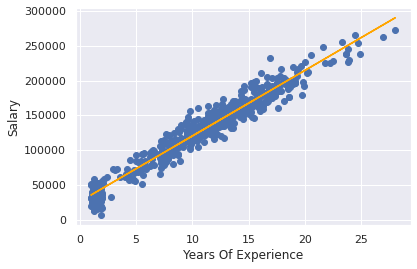

In [9]:
plt.scatter(x1,y)
yhat=9449.9623*x1 +25790
fig=plt.plot(x1,yhat,c='orange',label='Regression Line')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

## Linear Regression Model using sklearn

### Reshaping Inputs 

In [10]:
x1.shape

(575,)

In [11]:
y.shape

(575,)

In [12]:
# reshaping inputs
x1=x1.values.reshape(-1,1)
x1.shape

(575, 1)

### Regression Itself

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### R Squared

In [14]:
reg.score(x1,y)

0.9529788608118601

### Coefficient And Intercept

In [15]:
#Coefficient
reg.coef_

array([9576.44156414])

In [16]:
#Intercept
reg.intercept_

24024.336027579106

### Train Test Split


In [17]:
#Importing train_test_split from sklearn.model_selection to perform a train test split
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=60)

In [18]:
#Displaying the shapes of training and testing data
col = ['x1_train', 'x1_test', 'y_train', 'y_test']
data = [x1_train, x1_test, y_train, y_test]
for i in range(len(col)):
    print('Shape of {}: {}'.format(col[i],data[i].shape))

Shape of x1_train: (460, 1)
Shape of x1_test: (115, 1)
Shape of y_train: (460,)
Shape of y_test: (115,)


### Plotting Dataset Distribution














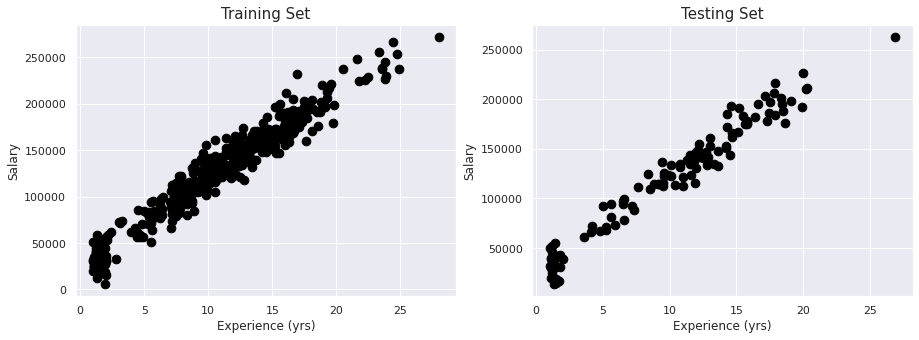

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(x1_train, y_train, s=75, color='black')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(x1_test, y_test, s=75, color='black')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

### Modeling And Fitting


In [20]:
reg=LinearRegression()
reg.fit(x1_train,y_train)
print(f'Coefficients: {reg.coef_}')
print(f'Intercepts: {reg.intercept_}')

Coefficients: [9591.71319961]
Intercepts: 23820.52186302787


### Plotting Regression Line

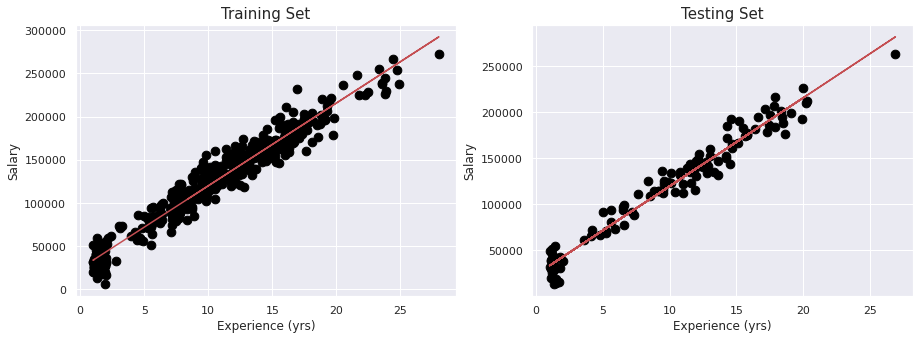

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(x1_train, y_train, s=75, color='black')
ax[0].plot(x1_train, reg.coef_*x1_train + reg.intercept_, '-r')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(x1_test, y_test, s=75, color='black')
ax[1].plot(x1_test, reg.coef_*x1_test + reg.intercept_, '-r')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

### Making Predictions on the test data

In [22]:
y_pred = np.round(reg.predict(x1_test))
my_df=pd.DataFrame({'Years Experience': x1_test[:,0], 'Actual Salary': y_test, 'Predicted Salary': y_pred})
my_df=my_df.reset_index(drop=True)
my_df

,Years Experience,Actual Salary,Predicted Salary
0,8.5,109442,105350.0
1,1.7,16058,40126.0
2,17.9,184439,195512.0
3,17.4,185939,190716.0
4,14.3,184618,160982.0
...,...,...,...
110,10.8,131368,127411.0
111,2.0,38913,43004.0
112,17.3,178276,189757.0
113,5.6,81117,77534.0


In [23]:
#Predicting Salary of a Person with 15 years of experience
reg.predict([[15]])

array([167696.21985719])

### Calculating R-squared

In [24]:
#Calculating R squared on training data
r2_train=reg.score(x1_train,y_train)
r2_train

0.9509687411039903

In [25]:
#Calculating R squared on testing data
r2_test=reg.score(x1_test,y_test)
r2_test

0.9605147405293014

In [26]:
#displaying R-squared
df_Train_Test=pd.DataFrame({'Training ':r2_train,'Testing ':r2_test},index=['R-squared'])
df_Train_Test

,Training,Testing
R-squared,0.950969,0.960515


## End of Simple Linear Regression Analysis.